# Jpred dataset statistics

1. distribution of SCOP classes
2. Taxonomic classification (Superkingdoms, Species)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
jpred = pd.read_csv('jpred.tsv', sep='\t')

In [43]:
SCOP_count = jpred["SCOPClass"].value_counts()
dataset = SCOP_count.rename_axis("SCOPClass").to_frame("counts")
dataset

,counts
SCOPClass,
Alpha and beta (a+b),394
All alpha,354
All beta,253
Alpha and beta (a/b),199
Small proteins,57
Membrane and cell surface proteins and peptides,54
Multi-domain proteins (alpha and beta),37


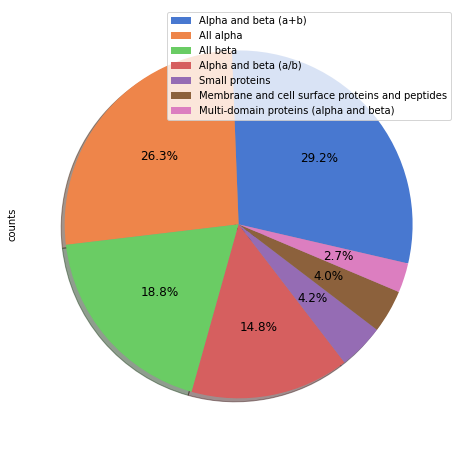

In [44]:
color_dataset = sns.color_palette("muted")
dataset.plot.pie(y="counts", autopct='%1.1f%%',shadow=True, explode=(0.0,0,0,0.0,0,0,0), startangle=-13,fontsize=12, figsize=(8,8), colors=color_dataset, labels= None)
plt.savefig("/Users/ceciliafoglini/Desktop/Untitled Folder/SCOP_structural.png")

# TAXONOMIC CLASSIFICATION:
     - Superkingdoms

In [45]:
Superkingdoms = jpred["Suprekingdom"].value_counts()
super_dataset = Superkingdoms.rename_axis("Superkingdom").to_frame("counts")

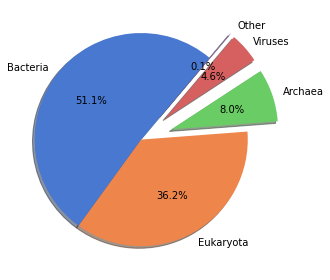

In [46]:
superk = ['Bacteria', 'Eukaryota', 'Archaea', 'Viruses', 'Other']
counts = [689, 488, 108, 62, 1 ]


col = sns.color_palette("muted")
# col = sns.color_palette("husl", 9)
# col = sns.color_palette("pastel")
fig1, ax1 = plt.subplots()
ax1.pie(counts,  labels=superk,explode=(0.0,0,0.3,0.3, 0.3), shadow=True, autopct='%1.1f%%', startangle=50, colors=col)# Equal aspect ratio ensures that pie is drawn as a circle
  
plt.tight_layout()

plt.savefig("/Users/ceciliafoglini/Desktop/Untitled Folder/tax_superkingdoms.png")
plt.show()

    - Species

In [47]:
Species_count = jpred["TaxaName"].value_counts()
type(Species_count)
# list1 = Species_count.keys()

# inde_x = pd.DataFrame(list1)

species_dataset = pd.DataFrame(Species_count)
species_dataset["Species"]=species_dataset.index #["Species", "Sum"]

species_dataset.rename(columns = {"TaxaName":"Total"}, inplace=True) 
type(species_dataset)
species_dataset.shape

(420, 2)

In [48]:
species_dataset_sort = species_dataset.sort_values(by="Total", axis=0, ascending=False)
species = species_dataset_sort.nlargest(10, ['Total'])
display(species)
print('Sum of top 10: ')
print(species['Total'].sum())

bottom_all_but_10 = species_dataset_sort.iloc[10:420, 0]
# display(bottom_all_but_10)
all_minus_10 = bottom_all_but_10.sum()
print('Sum of rest\n', all_minus_10)

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Escherichia coli K-12,29,Escherichia coli K-12
Mus musculus,28,Mus musculus
Thermotoga maritima,22,Thermotoga maritima
Thermus thermophilus HB8,19,Thermus thermophilus HB8
Thermus thermophilus,17,Thermus thermophilus


Sum of top 10: 
535
Sum of rest
 813


In [52]:
species.loc['Other']=[813, 'Other']
species

,Total,Species
Homo sapiens,215,Homo sapiens
Escherichia coli,106,Escherichia coli
Bos taurus,36,Bos taurus
Bacillus subtilis,32,Bacillus subtilis
Saccharomyces cerevisiae,31,Saccharomyces cerevisiae
Escherichia coli K-12,29,Escherichia coli K-12
Mus musculus,28,Mus musculus
Thermotoga maritima,22,Thermotoga maritima
Thermus thermophilus HB8,19,Thermus thermophilus HB8
Thermus thermophilus,17,Thermus thermophilus


<function matplotlib.pyplot.show(close=None, block=None)>

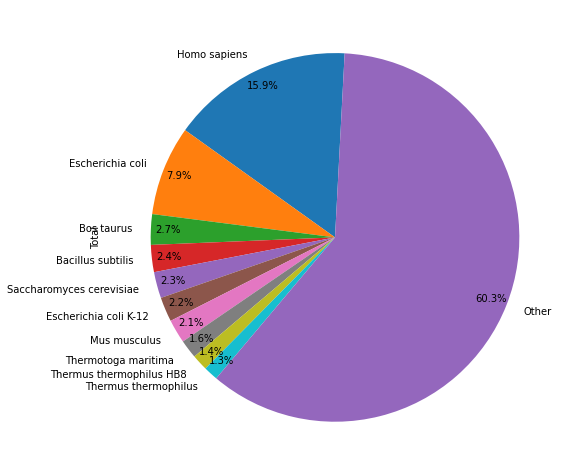

In [68]:
species.sum() # checks out


color=['tab:blue','tab:orange',
'tab:green',
'tab:red',
'tab:purple',
'tab:brown',
'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan',
'tab:purple']
species.plot.pie(y='Total', autopct='%1.1f%%', explode=(0,0,0,0,0,0,0,0,0,0,0), figsize=(8,8), startangle=87, legend=None, colors = color, pctdistance=0.91, labeldistance=1.1)

# plt.xticks(rotation=30) 
# ax.set_yticklabels([])
plt.tight_layout()
plt.savefig("/Users/ceciliafoglini/Desktop/Untitled Folder/tax_species.png")
plt.show


